# Merge data demo
using file  hourly_temp_humid.csv and 002_verwanltung.csv


In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid')



# Load weather data

In [2]:
# df_weather = pd.read_csv('../data_preprocessing/Processed_data/hourly_temp_humdi.csv')
df_weather = pd.read_csv('../data_preprocessing/Processed_data/hourly_weather.csv')

In [3]:
df_weather

,DateTime,Temperature,Humidity,Dewpoint,Sun Duration,Precipitation Height,Wind Speed,Wind Direction
0,2022-01-01 00:00:00,13.2,85.0,10.7,0.0,0.0,5.0,240.0
1,2022-01-01 01:00:00,13.1,87.0,11.0,0.0,0.0,4.8,240.0
2,2022-01-01 02:00:00,12.8,88.0,11.0,0.0,0.0,4.5,230.0
3,2022-01-01 03:00:00,12.6,88.0,10.7,0.0,0.0,4.4,210.0
4,2022-01-01 04:00:00,12.6,86.0,10.3,0.0,0.0,4.0,220.0
...,...,...,...,...,...,...,...,...
8755,2022-12-31 19:00:00,15.3,63.0,8.3,0.0,0.0,8.0,180.0
8756,2022-12-31 20:00:00,15.4,59.0,7.3,0.0,0.0,8.0,170.0
8757,2022-12-31 21:00:00,16.3,52.0,6.4,0.0,0.0,8.2,190.0
8758,2022-12-31 22:00:00,16.3,52.0,6.4,0.0,0.0,8.9,200.0


In [4]:
df_verwaltung = pd.read_csv('../data_preprocessing/Processed_data/002_verwaltung.csv')

In [5]:
df_verwaltung

,DateTime,electricity_15min_diff,heating_15min_diff
0,2022-01-01 00:00:00,0.00,0.0
1,2022-01-01 00:15:00,1.38,5.0
2,2022-01-01 00:30:00,1.20,5.0
3,2022-01-01 00:45:00,1.37,5.0
4,2022-01-01 01:00:00,1.15,5.0
...,...,...,...
35036,2022-12-31 23:00:00,2.12,3.0
35037,2022-12-31 23:15:00,1.64,2.0
35038,2022-12-31 23:30:00,1.87,3.0
35039,2022-12-31 23:45:00,1.65,3.0


In [6]:
df = df_verwaltung.merge(df_weather, on='DateTime', how='left')

In [7]:
df.fillna(method='ffill', inplace=True)

In [8]:
df

,DateTime,electricity_15min_diff,heating_15min_diff,Temperature,Humidity,Dewpoint,Sun Duration,Precipitation Height,Wind Speed,Wind Direction
0,2022-01-01 00:00:00,0.00,0.0,13.2,85.0,10.7,0.0,0.0,5.0,240.0
1,2022-01-01 00:15:00,1.38,5.0,13.2,85.0,10.7,0.0,0.0,5.0,240.0
2,2022-01-01 00:30:00,1.20,5.0,13.2,85.0,10.7,0.0,0.0,5.0,240.0
3,2022-01-01 00:45:00,1.37,5.0,13.2,85.0,10.7,0.0,0.0,5.0,240.0
4,2022-01-01 01:00:00,1.15,5.0,13.1,87.0,11.0,0.0,0.0,4.8,240.0
...,...,...,...,...,...,...,...,...,...,...
35036,2022-12-31 23:00:00,2.12,3.0,16.9,50.0,6.4,0.0,0.0,8.2,190.0
35037,2022-12-31 23:15:00,1.64,2.0,16.9,50.0,6.4,0.0,0.0,8.2,190.0
35038,2022-12-31 23:30:00,1.87,3.0,16.9,50.0,6.4,0.0,0.0,8.2,190.0
35039,2022-12-31 23:45:00,1.65,3.0,16.9,50.0,6.4,0.0,0.0,8.2,190.0


In [9]:
df.keys()

Index(['DateTime', 'electricity_15min_diff', 'heating_15min_diff',
       'Temperature', 'Humidity', 'Dewpoint', 'Sun Duration',
       'Precipitation Height', 'Wind Speed', 'Wind Direction'],
      dtype='object')

In [10]:
# Assuming df is your DataFrame and it has a 'DateTime' column
df['DateTime'] = pd.to_datetime(df['DateTime'], format='%Y-%m-%d %H:%M:%S')
df.set_index('DateTime', inplace=True)


In [11]:

# Define the output folder and file path
output_folder = '..\\data_preprocessing\\Merged_data'
output_file = os.path.join(output_folder, '002_verwaltung.csv')

# Create the folder if it doesn't exist
os.makedirs(output_folder, exist_ok=True)

# Export the DataFrame to a CSV file
df.to_csv(output_file)

print(f"DataFrame exported to {output_file}")

DataFrame exported to ..\data_preprocessing\Merged_data\002_verwaltung.csv


# Merge data with holidays

In [12]:
df_with_holidays = pd.read_csv('../data_preprocessing/Processed_data/002_verwaltung_with_holidays.csv')

In [13]:
df_merged_holidays = df_with_holidays.merge(df_weather, on='DateTime', how='left')
# df_with_holidays.fillna(method='ffill', inplace=True)

In [14]:
df_merged_holidays

,DateTime,electricity_15min_diff,heating_15min_diff,is_holiday,day_of_week,hour_of_day,is_working_hour,Temperature,Humidity,Dewpoint,Sun Duration,Precipitation Height,Wind Speed,Wind Direction
0,2022-01-01 00:00:00,0.00,0.0,True,5,0,False,13.2,85.0,10.7,0.0,0.0,5.0,240.0
1,2022-01-01 00:15:00,1.38,5.0,True,5,0,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2022-01-01 00:30:00,1.20,5.0,True,5,0,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2022-01-01 00:45:00,1.37,5.0,True,5,0,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2022-01-01 01:00:00,1.15,5.0,True,5,1,False,13.1,87.0,11.0,0.0,0.0,4.8,240.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35036,2022-12-31 23:00:00,2.12,3.0,True,5,23,False,16.9,50.0,6.4,0.0,0.0,8.2,190.0
35037,2022-12-31 23:15:00,1.64,2.0,True,5,23,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35038,2022-12-31 23:30:00,1.87,3.0,True,5,23,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35039,2022-12-31 23:45:00,1.65,3.0,True,5,23,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
df_merged_holidays.fillna(method='ffill', inplace=True)

In [16]:
df_merged_holidays

,DateTime,electricity_15min_diff,heating_15min_diff,is_holiday,day_of_week,hour_of_day,is_working_hour,Temperature,Humidity,Dewpoint,Sun Duration,Precipitation Height,Wind Speed,Wind Direction
0,2022-01-01 00:00:00,0.00,0.0,True,5,0,False,13.2,85.0,10.7,0.0,0.0,5.0,240.0
1,2022-01-01 00:15:00,1.38,5.0,True,5,0,False,13.2,85.0,10.7,0.0,0.0,5.0,240.0
2,2022-01-01 00:30:00,1.20,5.0,True,5,0,False,13.2,85.0,10.7,0.0,0.0,5.0,240.0
3,2022-01-01 00:45:00,1.37,5.0,True,5,0,False,13.2,85.0,10.7,0.0,0.0,5.0,240.0
4,2022-01-01 01:00:00,1.15,5.0,True,5,1,False,13.1,87.0,11.0,0.0,0.0,4.8,240.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35036,2022-12-31 23:00:00,2.12,3.0,True,5,23,False,16.9,50.0,6.4,0.0,0.0,8.2,190.0
35037,2022-12-31 23:15:00,1.64,2.0,True,5,23,False,16.9,50.0,6.4,0.0,0.0,8.2,190.0
35038,2022-12-31 23:30:00,1.87,3.0,True,5,23,False,16.9,50.0,6.4,0.0,0.0,8.2,190.0
35039,2022-12-31 23:45:00,1.65,3.0,True,5,23,False,16.9,50.0,6.4,0.0,0.0,8.2,190.0


In [17]:
df_merged_holidays.set_index('DateTime', inplace=True)

In [18]:
df_merged_holidays.keys()

Index(['electricity_15min_diff', 'heating_15min_diff', 'is_holiday',
       'day_of_week', 'hour_of_day', 'is_working_hour', 'Temperature',
       'Humidity', 'Dewpoint', 'Sun Duration', 'Precipitation Height',
       'Wind Speed', 'Wind Direction'],
      dtype='object')

In [19]:
# Define the output folder and file path
output_folder = '..\\data_preprocessing\\Merged_data'
output_file = os.path.join(output_folder, '002_verwaltung_with_holidays.csv')

# Create the folder if it doesn't exist
os.makedirs(output_folder, exist_ok=True)

# Export the DataFrame to a CSV file
df_merged_holidays.to_csv(output_file)

print(f"DataFrame exported to {output_file}")

DataFrame exported to ..\data_preprocessing\Merged_data\002_verwaltung_with_holidays.csv


In [20]:
df.keys()

Index(['electricity_15min_diff', 'heating_15min_diff', 'Temperature',
       'Humidity', 'Dewpoint', 'Sun Duration', 'Precipitation Height',
       'Wind Speed', 'Wind Direction'],
      dtype='object')

# merge data with indoor features

In [21]:
df_with_indoor_person = pd.read_csv('../data_preprocessing/Processed_data/002_verwaltung_with_holidays_counrs_person.csv')

In [22]:
df_with_indoor_person

,DateTime,electricity_15min_diff,heating_15min_diff,is_holiday,day_of_week,hour_of_day,is_working_hour,number_of_people
0,2022-01-01 00:00:00,0.00,0.0,True,5,0,False,0
1,2022-01-01 00:15:00,1.38,5.0,True,5,0,False,0
2,2022-01-01 00:30:00,1.20,5.0,True,5,0,False,0
3,2022-01-01 00:45:00,1.37,5.0,True,5,0,False,0
4,2022-01-01 01:00:00,1.15,5.0,True,5,1,False,0
...,...,...,...,...,...,...,...,...
35036,2022-12-31 23:00:00,2.12,3.0,True,5,23,False,0
35037,2022-12-31 23:15:00,1.64,2.0,True,5,23,False,0
35038,2022-12-31 23:30:00,1.87,3.0,True,5,23,False,0
35039,2022-12-31 23:45:00,1.65,3.0,True,5,23,False,0


In [23]:
df_merged_count_person = df_with_indoor_person.merge(df_weather, on='DateTime', how='left')

In [24]:
df_merged_count_person

,DateTime,electricity_15min_diff,heating_15min_diff,is_holiday,day_of_week,hour_of_day,is_working_hour,number_of_people,Temperature,Humidity,Dewpoint,Sun Duration,Precipitation Height,Wind Speed,Wind Direction
0,2022-01-01 00:00:00,0.00,0.0,True,5,0,False,0,13.2,85.0,10.7,0.0,0.0,5.0,240.0
1,2022-01-01 00:15:00,1.38,5.0,True,5,0,False,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2022-01-01 00:30:00,1.20,5.0,True,5,0,False,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2022-01-01 00:45:00,1.37,5.0,True,5,0,False,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2022-01-01 01:00:00,1.15,5.0,True,5,1,False,0,13.1,87.0,11.0,0.0,0.0,4.8,240.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35036,2022-12-31 23:00:00,2.12,3.0,True,5,23,False,0,16.9,50.0,6.4,0.0,0.0,8.2,190.0
35037,2022-12-31 23:15:00,1.64,2.0,True,5,23,False,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35038,2022-12-31 23:30:00,1.87,3.0,True,5,23,False,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35039,2022-12-31 23:45:00,1.65,3.0,True,5,23,False,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [25]:
df_merged_count_person.fillna(method='ffill', inplace=True)

In [26]:
df_merged_count_person.set_index('DateTime', inplace=True)

In [27]:
df_merged_count_person

,electricity_15min_diff,heating_15min_diff,is_holiday,day_of_week,hour_of_day,is_working_hour,number_of_people,Temperature,Humidity,Dewpoint,Sun Duration,Precipitation Height,Wind Speed,Wind Direction
DateTime,,,,,,,,,,,,,,
2022-01-01 00:00:00,0.00,0.0,True,5,0,False,0,13.2,85.0,10.7,0.0,0.0,5.0,240.0
2022-01-01 00:15:00,1.38,5.0,True,5,0,False,0,13.2,85.0,10.7,0.0,0.0,5.0,240.0
2022-01-01 00:30:00,1.20,5.0,True,5,0,False,0,13.2,85.0,10.7,0.0,0.0,5.0,240.0
2022-01-01 00:45:00,1.37,5.0,True,5,0,False,0,13.2,85.0,10.7,0.0,0.0,5.0,240.0
2022-01-01 01:00:00,1.15,5.0,True,5,1,False,0,13.1,87.0,11.0,0.0,0.0,4.8,240.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-31 23:00:00,2.12,3.0,True,5,23,False,0,16.9,50.0,6.4,0.0,0.0,8.2,190.0
2022-12-31 23:15:00,1.64,2.0,True,5,23,False,0,16.9,50.0,6.4,0.0,0.0,8.2,190.0
2022-12-31 23:30:00,1.87,3.0,True,5,23,False,0,16.9,50.0,6.4,0.0,0.0,8.2,190.0


In [28]:
df_merged_count_person.keys()

Index(['electricity_15min_diff', 'heating_15min_diff', 'is_holiday',
       'day_of_week', 'hour_of_day', 'is_working_hour', 'number_of_people',
       'Temperature', 'Humidity', 'Dewpoint', 'Sun Duration',
       'Precipitation Height', 'Wind Speed', 'Wind Direction'],
      dtype='object')

In [29]:
# Add the indoor temperature column
df_merged_count_person['indoor_temperature'] = np.where(df_merged_count_person['is_working_hour'], 22, df_merged_count_person['Temperature'])

# Add the difference column
df_merged_count_person['temperature_difference'] = df_merged_count_person['indoor_temperature'] - df_merged_count_person['Temperature']

In [30]:
print(df_merged_count_person.iloc[-2,:].to_dict())

{'electricity_15min_diff': 1.6499999999068675, 'heating_15min_diff': 3.0, 'is_holiday': True, 'day_of_week': 5, 'hour_of_day': 23, 'is_working_hour': False, 'number_of_people': 0, 'Temperature': 16.9, 'Humidity': 50.0, 'Dewpoint': 6.4, 'Sun Duration': 0.0, 'Precipitation Height': 0.0, 'Wind Speed': 8.2, 'Wind Direction': 190.0, 'indoor_temperature': 16.9, 'temperature_difference': 0.0}


In [31]:
# Define the output folder and file path
output_folder = '..\\data_preprocessing\\Merged_data'
output_file = os.path.join(output_folder, '002_verwaltung_with_holidays_indoor_person_counts.csv')

# Create the folder if it doesn't exist
os.makedirs(output_folder, exist_ok=True)

# Export the DataFrame to a CSV file
df_merged_count_person.to_csv(output_file)

print(f"DataFrame exported to {output_file}")

DataFrame exported to ..\data_preprocessing\Merged_data\002_verwaltung_with_holidays_indoor_person_counts.csv


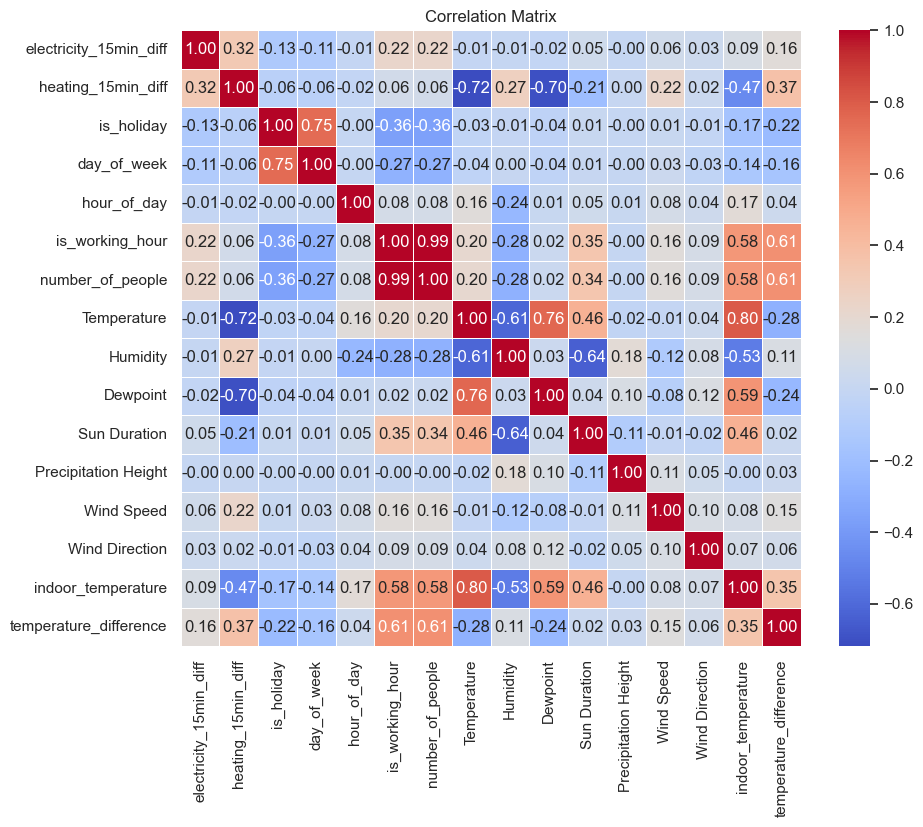

In [32]:

# Calculate the correlation matrix
corr_matrix = df_merged_count_person.corr()

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Draw the heatmap with the correlation matrix
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)

# Set the title
plt.title('Correlation Matrix')

# Show the plot
plt.show()

# Hourly Data Merge

In [33]:
df_hourly = pd.read_csv('../data_preprocessing/Processed_data/002_verwaltung_hourly_with_holidays_counrs_person.csv')

In [34]:
df_hourly

,DateTime,electricity_hourly_diff,heating_hourly_diff,is_holiday,day_of_week,hour_of_day,is_working_hour,number_of_people
0,2022-01-01 00:00:00,0.0000,0.00,1.0,5.0,0.0,0.0,0.0
1,2022-01-01 01:00:00,5.0575,20.00,1.0,5.0,1.0,0.0,0.0
2,2022-01-01 02:00:00,4.9550,19.75,1.0,5.0,2.0,0.0,0.0
3,2022-01-01 03:00:00,5.0300,19.25,1.0,5.0,3.0,0.0,0.0
4,2022-01-01 04:00:00,6.3300,20.00,1.0,5.0,4.0,0.0,0.0
...,...,...,...,...,...,...,...,...
8756,2022-12-31 20:00:00,8.9575,12.00,1.0,5.0,20.0,0.0,0.0
8757,2022-12-31 21:00:00,7.5575,12.00,1.0,5.0,21.0,0.0,0.0
8758,2022-12-31 22:00:00,7.1250,12.00,1.0,5.0,22.0,0.0,0.0
8759,2022-12-31 23:00:00,7.4400,11.25,1.0,5.0,23.0,0.0,0.0


In [35]:
df_hourly_merged_indoor_features = df_hourly.merge(df_weather, on='DateTime', how='left')
df_hourly_merged_indoor_features.fillna(method='ffill', inplace=True)

In [36]:
# List rows with NaN values in df_hourly_merged_indoor_features
nan_rows = df_hourly_merged_indoor_features[df_hourly_merged_indoor_features.isna().any(axis=1)]

# Display the rows with NaN values
nan_rows

,DateTime,electricity_hourly_diff,heating_hourly_diff,is_holiday,day_of_week,hour_of_day,is_working_hour,number_of_people,Temperature,Humidity,Dewpoint,Sun Duration,Precipitation Height,Wind Speed,Wind Direction


In [37]:
df_hourly_merged_indoor_features.set_index('DateTime', inplace=True)

In [38]:
# Add the indoor temperature column
df_hourly_merged_indoor_features['indoor_temperature'] = np.where(df_hourly_merged_indoor_features['is_working_hour'], 22, df_hourly_merged_indoor_features['Temperature'])

# Add the difference column
df_hourly_merged_indoor_features['temperature_difference'] = df_hourly_merged_indoor_features['indoor_temperature'] - df_hourly_merged_indoor_features['Temperature']

In [39]:
df_hourly_merged_indoor_features

,electricity_hourly_diff,heating_hourly_diff,is_holiday,day_of_week,hour_of_day,is_working_hour,number_of_people,Temperature,Humidity,Dewpoint,Sun Duration,Precipitation Height,Wind Speed,Wind Direction,indoor_temperature,temperature_difference
DateTime,,,,,,,,,,,,,,,,
2022-01-01 00:00:00,0.0000,0.00,1.0,5.0,0.0,0.0,0.0,13.2,85.0,10.7,0.0,0.0,5.0,240.0,13.2,0.0
2022-01-01 01:00:00,5.0575,20.00,1.0,5.0,1.0,0.0,0.0,13.1,87.0,11.0,0.0,0.0,4.8,240.0,13.1,0.0
2022-01-01 02:00:00,4.9550,19.75,1.0,5.0,2.0,0.0,0.0,12.8,88.0,11.0,0.0,0.0,4.5,230.0,12.8,0.0
2022-01-01 03:00:00,5.0300,19.25,1.0,5.0,3.0,0.0,0.0,12.6,88.0,10.7,0.0,0.0,4.4,210.0,12.6,0.0
2022-01-01 04:00:00,6.3300,20.00,1.0,5.0,4.0,0.0,0.0,12.6,86.0,10.3,0.0,0.0,4.0,220.0,12.6,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-31 20:00:00,8.9575,12.00,1.0,5.0,20.0,0.0,0.0,15.4,59.0,7.3,0.0,0.0,8.0,170.0,15.4,0.0
2022-12-31 21:00:00,7.5575,12.00,1.0,5.0,21.0,0.0,0.0,16.3,52.0,6.4,0.0,0.0,8.2,190.0,16.3,0.0
2022-12-31 22:00:00,7.1250,12.00,1.0,5.0,22.0,0.0,0.0,16.3,52.0,6.4,0.0,0.0,8.9,200.0,16.3,0.0


In [40]:
# Define the output folder and file path
output_folder = '..\\data_preprocessing\\Merged_data'
output_file = os.path.join(output_folder, '002_verwaltung_hourly_with_holidays_indoor_person_counts.csv')

# Create the folder if it doesn't exist
os.makedirs(output_folder, exist_ok=True)

# Export the DataFrame to a CSV file
df_hourly_merged_indoor_features.to_csv(output_file)

print(f"DataFrame exported to {output_file}")

DataFrame exported to ..\data_preprocessing\Merged_data\002_verwaltung_hourly_with_holidays_indoor_person_counts.csv


In [41]:
# df['DateTime'] = pd.to_datetime(df['DateTime'], format='%Y-%m-%d %H:%M:%S')
# df.set_index('DateTime', inplace=True)

# Define the date ranges for training and test data
train_end_date = df.index.min() + pd.DateOffset(months=9)
test_start_date = train_end_date

# Split the DataFrame
train_data = df[:train_end_date]
test_data = df[test_start_date:]

In [42]:
train_data.tail()

,electricity_15min_diff,heating_15min_diff,Temperature,Humidity,Dewpoint,Sun Duration,Precipitation Height,Wind Speed,Wind Direction
DateTime,,,,,,,,,
2022-09-30 23:00:00,1.36,3.0,12.8,68.0,7.1,0.0,0.0,7.5,170.0
2022-09-30 23:15:00,1.18,2.0,12.8,68.0,7.1,0.0,0.0,7.5,170.0
2022-09-30 23:30:00,1.44,3.0,12.8,68.0,7.1,0.0,0.0,7.5,170.0
2022-09-30 23:45:00,1.18,3.0,12.8,68.0,7.1,0.0,0.0,7.5,170.0
2022-10-01 00:00:00,1.39,3.0,12.5,70.0,7.2,0.0,0.0,7.5,170.0


In [43]:
test_data.head ()

,electricity_15min_diff,heating_15min_diff,Temperature,Humidity,Dewpoint,Sun Duration,Precipitation Height,Wind Speed,Wind Direction
DateTime,,,,,,,,,
2022-10-01 00:00:00,1.39,3.0,12.5,70.0,7.2,0.0,0.0,7.5,170.0
2022-10-01 00:15:00,1.21,2.0,12.5,70.0,7.2,0.0,0.0,7.5,170.0
2022-10-01 00:30:00,1.41,3.0,12.5,70.0,7.2,0.0,0.0,7.5,170.0
2022-10-01 00:45:00,1.17,3.0,12.5,70.0,7.2,0.0,0.0,7.5,170.0
2022-10-01 01:00:00,1.34,3.0,11.4,85.0,8.9,0.0,0.7,7.2,180.0
